In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
import nltk
nltk.download()
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [2]:
nlp=spacy.load('en_core_web_md')

In [3]:
data = pd.read_csv("E:\DS Assignments1\\Elon_musk.csv",encoding='latin1')

In [4]:
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)


In [6]:
data.head(20)

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,"Frodo was the underdoge,\nAll thought he would..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...
9,The most entertaining outcome is the most likely


In [7]:
data.shape

(1999, 1)

In [8]:
#check some tweets
pd.set_option("display.max_colwidth",None) # see full text
data.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!


In [9]:
import re
def clean_tweets(tweets):
    tweets = re.sub('@[A-Za-z0–9]+', '', tweets) #Removing tag(@)
    tweets = re.sub('#', '', tweets) # Removing hashtag(#)
    tweets = re.sub('RT[\s]+', '', tweets) # Removing Retweets
    tweets = re.sub('https?:\/\/\S+', '', tweets) # Removing links
    tweets = re.sub('<[^<]+?>', '', tweets) #remove html tags
    tweets = re.sub('\n', '', tweets) # remove new lines
    tweets = re.sub('&amp;', '', tweets) #remove &amp
    return tweets
 
data.Text = data.Text.apply(clean_tweets)

In [10]:
#Cleaning and removing punctuations

import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data.Text= data.Text.apply(lambda x: cleaning_punctuations(x))
data.tail()

,Text
1994,True it sounds so surreal but the negative propaganda is still all out there easy to find in social me
1995,Make sure to read ur terms conditions before clicking accept
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is
1998,Progress update August 28


In [11]:
# Cleaning and removing Numeric numbers

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data.Text = data.Text.apply(lambda x: cleaning_numbers(x))
data.Text.tail()

1994     True it sounds so surreal but the negative propaganda is still all out there  easy to find in social me
 
1995                                                 Make sure to read ur terms  conditions before clicking accept
1996                                                                                                Samwise Gamgee
1997                                                                                     Altho Dumb and Dumber is 
1998                                                                                       Progress update August 
Name: Text, dtype: object

In [12]:
#check some tweets
pd.set_option("display.max_colwidth",-1) # see full text
data.sample(10)

<ipython-input-12-000bfbdbd415>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth",-1) # see full text


,Text
745,emorgan Sure is
1726,Sure
1016,nafnlaus When Eberhard was fired from the Tesla CEO role in mid for providing false information to me t
1942,Tesla Autopilot was literally named after the term used in aviation Also what about Autobahn
1544,Bold move sir bold move
1932,This thing we call money is just a slow lossy unsecure database for labor allocati
825,Closest we got was about a month The Model ramp was extreme stress pa
1876,Nice work SpaceX team
1566,Enough Dojo is still being built Maybe a year or so from V
1345,AACarmack There is already bidirectional communication between human AI via phones computers Its just lo


In [13]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [14]:
data['Text'] = data['Text'].apply(lambda x: ' '.join(
    [word for word in x.split() if word not in (stop)]))
data.head()

,Text
0,Im alien
1,AACarmack Ray tracing Cyberpunk HDR nextlevel Have tried
2,Great interview
3,Doge underestimated
4,Congratulations Tesla China amazing execution last year Now next even


In [15]:
data = [x.strip() for x in data.Text] # remove both the leading and the trailing characters


In [16]:
data = [x for x in data if x] # removes empty strings, because they are considered in Python as False

In [19]:
 !pip install afinn
from afinn import Afinn

  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53449 sha256=df2fbd4e6cc0879849bebf15327fcaf92811d695355c2be218ffc0d5c7c9dcc4
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\f6\6f\c3\b305c5107a17618f2938a067d5ffcbb556909d82398762089e
Successfully built afinn


In [20]:
afn = Afinn()

In [22]:
#compute scores (polarity) and labels
scores = [afn.score(Text) for Text in data]
sentiment = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in scores]

In [23]:
# dataframe creation
sent_data = pd.DataFrame()
sent_data['title'] =  data
sent_data['scores'] = scores
sent_data['sentiments'] = sentiment

In [24]:
sent_data

,title,scores,sentiments
0,Im alien,0.0,neutral
1,AACarmack Ray tracing Cyberpunk HDR nextlevel Have tried,0.0,neutral
2,Great interview,3.0,positive
3,Doge underestimated,-1.0,negative
4,Congratulations Tesla China amazing execution last year Now next even,6.0,positive
...,...,...,...
1874,True sounds surreal negative propaganda still easy find social,-1.0,negative
1875,Make sure read ur terms conditions clicking accept,1.0,positive
1876,Samwise Gamgee,0.0,neutral
1877,Altho Dumb Dumber,-3.0,negative


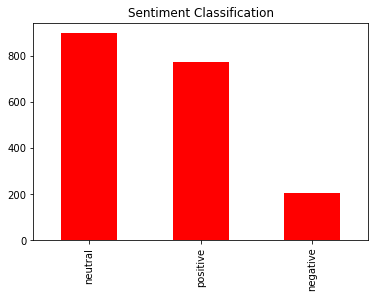

In [25]:
# let's see how many ratio of sentiment
sent_data.sentiments.value_counts().plot(kind='bar', color='red')
plt.title('Sentiment Classification')
plt.show()

In [26]:
# how many words are in the sentence?
sent_data['word_count'] = sent_data['title'].str.split().apply(len)
sent_data.head(10)

,title,scores,sentiments,word_count
0,Im alien,0.0,neutral,2
1,AACarmack Ray tracing Cyberpunk HDR nextlevel Have tried,0.0,neutral,8
2,Great interview,3.0,positive,2
3,Doge underestimated,-1.0,negative,2
4,Congratulations Tesla China amazing execution last year Now next even,6.0,positive,10
5,Happy New Year Ox,3.0,positive,4
6,Frodo underdogeAll thought would failHimself,0.0,neutral,5
7,Haha thanks,5.0,positive,2
8,Indeed Tweets definitely represent realworld time allocation,0.0,neutral,7
9,The entertaining outcome likely,2.0,positive,4


In [27]:
sent_data['scores'].describe()

count    1879.000000
mean     0.854710   
std      1.941001   
min     -8.000000   
25%      0.000000   
50%      0.000000   
75%      2.000000   
max      12.000000  
Name: scores, dtype: float64

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='scores', ylabel='Density'>

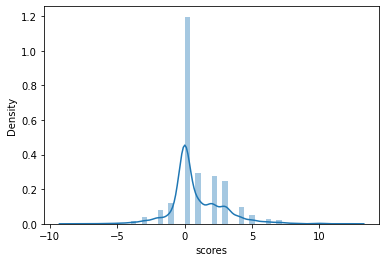

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_data['scores'])

In [30]:
sent_data['index']=range(0,len(sent_data))

<AxesSubplot:xlabel='index', ylabel='scores'>

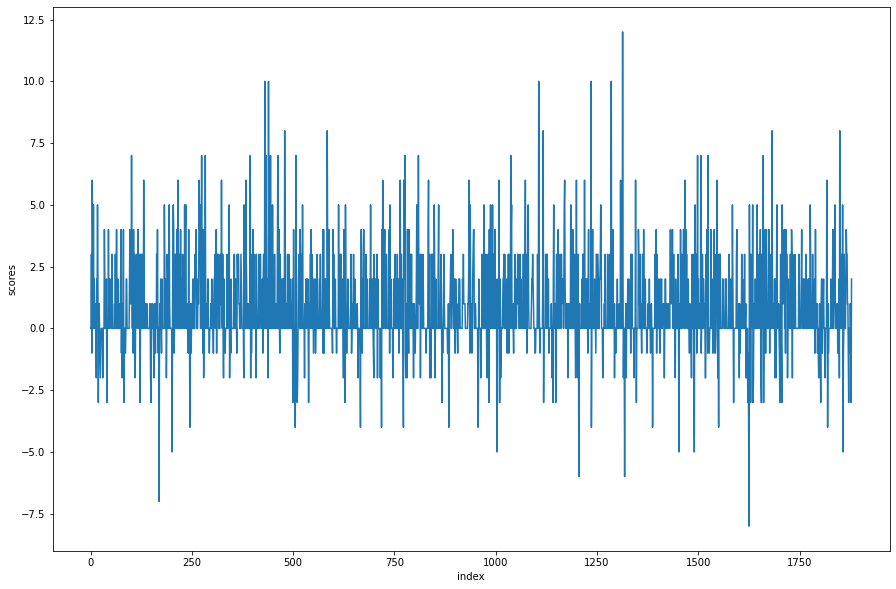

In [32]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='scores',x='index',data=sent_data)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='scores'>

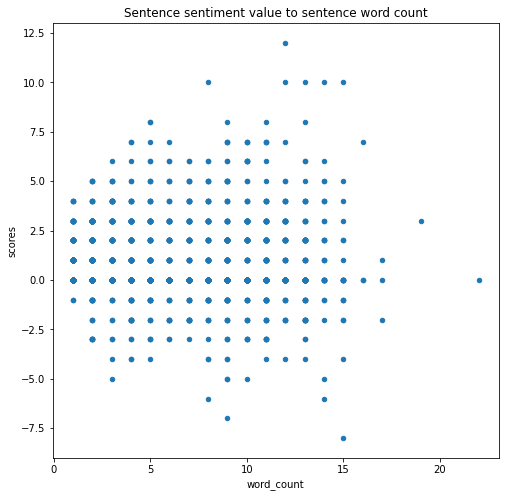

In [33]:
sent_data.plot.scatter(x='word_count', y='scores', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [35]:
# check which word is used most by Elon
 
# setting up stop words 
nltk.download('stopwords')
stpwrd = set(nltk.corpus.stopwords.words('english'))
 
# Combining all tweets text
allWords = ' '.join([tweets for tweets in sent_data['title']])
 
# # Image we will use for Word's cloud mask
# from google.colab import files
# uploaded = files.upload()
 
# # by default files are uploaded in /content folder 
# import cv2
# image = cv2.imread('/content/'+next(iter(uploaded))) 
# Elon = image

!pip install opencv-python
import cv2
image = cv2.imread('images/elon_musk.png') 
Elon = image

# word cloud
def word_cloud(data, title, mask=None):
    Cloud = WordCloud(scale=3,
                      random_state=21,
                      colormap='autumn',
                      mask=mask,
                      stopwords=stpwrd,
                      collocations=True,).generate(data)
    plt.figure(figsize=(20,12))
    plt.imshow(Cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


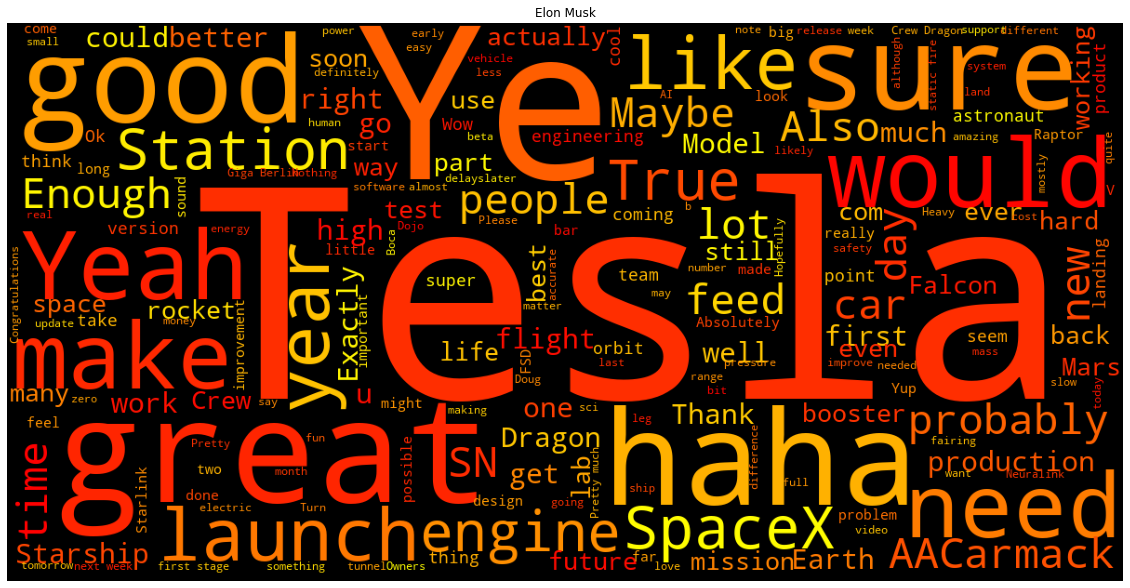

In [36]:
# plot it
word_cloud(allWords, 'Elon Musk', mask=Elon)